# Chapter 17 in chapter exercises

In [1]:
# import libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

In [2]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })
     

### Power for a one-sample t-test

In [3]:
# parameters
xBar = 1
h0   = 0
std  = 2
n    = 42 # sample size
alpha = .05  # significance level

In [4]:
# Compute the non-centrality parameter
tee = (xBar-h0) / (std/np.sqrt(n))


In [5]:
# Critical t-values (2-tailed)
df = n - 1  # df for one-sample t-test
t_critL = stats.t.ppf(alpha/2, df) 
t_critR = stats.t.ppf(1-alpha/2, df)

In [6]:
# two one-sided power areas
powerL = stats.t.cdf(t_critL+tee, df) # note shiting the distribution
powerR = 1 - stats.t.cdf(t_critR+tee, df)

# can also use the loc input:
#powerL = stats.t.cdf(t_critL, df, loc=delta)

In [7]:
# total power
totalPower = powerL + powerR

In [8]:
# and report
print(f't = {tee:.3f}')
print(f'shifted tau-left = {t_critL+tee:.3f}')
print(f'shifted tau-right = {t_critR+tee:.3f}')
print('')
print(f'Statistical power: {totalPower:.4f}')

t = 3.240
shifted tau-left = 1.221
shifted tau-right = 5.260

Statistical power: 0.8854


### Fig 17.2: Visualization of statistical power

In [9]:
# parameters
xBar = 1
h0   = 0
std  = 2
n    = 42 # sample size
alpha = .05  # significance level

In [10]:
# Compute the non-centrality parameter
tee = (xBar-h0) / (std/np.sqrt(n))


In [11]:
# Critical t-values (2-tailed)
df = n - 1  # df for one-sample t-test
t_critL = stats.t.ppf(alpha/2, df) 
t_critR = stats.t.ppf(1-alpha/2, df)

In [12]:
# two one-sided power areas
powerL = stats.t.cdf(t_critL+tee, df) # note shiting the distribution
powerR = 1 - stats.t.cdf(t_critR+tee, df)
totalPower = powerL + powerR

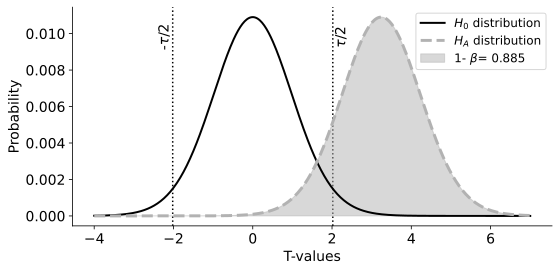

In [13]:
# t-values
tvals = np.linspace(-4,7,401)

# open the figure
plt.figure(figsize=(8,4))

# draw the distributions
plt.plot(tvals,stats.t.pdf(tvals,n-1)*np.diff(tvals[:2]),'k',linewidth=2, label=r'$H_0$ distribution')
plt.plot(tvals,stats.t.pdf(tvals-tee,n-1)*np.diff(tvals[:2]),'--',linewidth=3,color=(.7,.7,.7), label=r'$H_A$ distribution')

# critical t-values at alpha=.025 ("tau" in the equations)
plt.axvline(t_critL,color='k',linestyle=':',zorder=-3)
plt.axvline(t_critR,color='k',linestyle=':',zorder=-3)
plt.text(t_critL-.2,stats.t.pdf(0,n-1)*.9*np.diff(tvals[:2]),r'-$\tau/2$',rotation=90,ha='center',va='center')
plt.text(t_critR+.22,stats.t.pdf(0,n-1)*.9*np.diff(tvals[:2]),r'$\tau/2$',rotation=90,ha='center',va='center')

# fill in areas for computing 1-beta (note: basically invisible on the left side; try setting xBar=-1)
plt.fill_between(tvals,stats.t.pdf(tvals-tee,n-1)*np.diff(tvals[:2]),where=(tvals),color=(.7,.7,.7),alpha=.5,label=fr'1- $\beta$= {totalPower:.3f}')

# labels
plt.xlabel('T-values')
plt.ylabel('Probability')
plt.legend(fontsize=12)

# display the figure
plt.tight_layout()
plt.show()
     

### Using statsmodels

In [16]:
# parameters
xBar = 1
h0   = 0
std  = 2 # sample standard deviation
sampsize = 42
alpha = .05  # significance level


In [17]:
ffectSize = (xBar-h0) / std
power_sm = smp.TTestPower().power(
    effect_size=effectSize, nobs=sampsize, alpha=alpha, alternative='two-sided')

In [18]:
print(f'Statistical power using statsmodels: {power_sm:.4f}')

Statistical power using statsmodels: 0.9880


### Sample size for a desired power

In [19]:
# parameters
power = .8  # desired statistical power level (1-\beta)
h0    = 0   # mean if H0 is true
xBar  = 1   # sample mean
std   = 1.5 # sample standard deviation

In [20]:
# effect size
effectSize = (xBar-h0) / std

In [21]:
# compute sample size
sample_size = smp.TTestPower().solve_power(
    effect_size=effectSize, alpha=.05, power=power, alternative='two-sided')

In [22]:
# and report
print(f'Required sample size: {round(sample_size)}')

Required sample size: 20
